In [2]:
# Import packages
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
# Read in the data
data = pd.read_csv("../coal-price-data/AirPassengers.csv")

In [4]:
data["Month"] = pd.to_datetime(data["Month"])

In [5]:
# Split train and test
train = data.iloc[: -int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2) :]

In [6]:
def plot_func(forecast: list[float], title: str, save_path: str = None) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=train["Month"], y=train["#Passengers"], name="Train")
    )
    fig.add_trace(
        go.Scatter(x=test["Month"], y=test["#Passengers"], name="Test")
    )
    fig.add_trace(go.Scatter(x=test["Month"], y=forecast, name="Forecast"))
    fig.update_layout(
        template="simple_white",
        font=dict(size=18),
        title_text=title,
        width=700,
        title_x=0.5,
        height=400,
        xaxis_title="Date",
        yaxis_title="Passenger Volume",
    )

    return fig.show()

In [7]:
# Fit Holt Winters model and get forecasts
model = ExponentialSmoothing(
    train["#Passengers"], trend="mul", seasonal="mul", seasonal_periods=12
).fit(optimized=True)

/home/ibnu/miniconda3/envs/py311-kfp240-airflow251/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [13]:
model

In [8]:
forecasts = model.forecast(len(test))

In [12]:
test

Month  #Passengers
116 1958-09-01          404
117 1958-10-01          359
118 1958-11-01          310
119 1958-12-01          337
120 1959-01-01          360
121 1959-02-01          342
122 1959-03-01          406
123 1959-04-01          396
124 1959-05-01          420
125 1959-06-01          472
126 1959-07-01          548
127 1959-08-01          559
128 1959-09-01          463
129 1959-10-01          407
130 1959-11-01          362
131 1959-12-01          405
132 1960-01-01          417
133 1960-02-01          391
134 1960-03-01          419
135 1960-04-01          461
136 1960-05-01          472
137 1960-06-01          535
138 1960-07-01          622
139 1960-08-01          606
140 1960-09-01          508
141 1960-10-01          461
142 1960-11-01          390
143 1960-12-01          432

In [10]:
forecasts

116    421.344912
117    362.116133
118    318.903773
119    356.258190
120    366.281250
121    349.727205
122    408.310119
123    402.054810
124    422.533093
125    506.604413
126    566.761747
127    553.397062
128    476.524463
129    409.539052
130    360.667579
131    402.913950
132    414.249635
133    395.527664
134    461.782627
135    454.708120
136    477.868249
137    572.949593
138    640.985163
139    625.870233
140    538.930358
141    463.172502
142    407.900795
143    455.679773
dtype: float64

In [9]:
# Plot the forecasts
plot_func(forecasts, "Holt Winters Forecast")

In [3]:
# Appending residuals and fitted values to the train dataframe
train["fittedvalues"] = model.fittedvalues
train["residuals"] = model.resid
print(train)

         Month  #Passengers  fittedvalues  residuals
0   1949-01-01          112    111.997011   0.002989
1   1949-02-01          118    119.397772  -1.397772
2   1949-03-01          132    132.485694  -0.485694
3   1949-04-01          129    126.790028   2.209972
4   1949-05-01          121    118.553190   2.446810
..         ...          ...           ...        ...
111 1958-04-01          348    370.894734 -22.894734
112 1958-05-01          363    370.984509  -7.984509
113 1958-06-01          435    435.713085  -0.713085
114 1958-07-01          491    479.724073  11.275927
115 1958-08-01          505    479.483081  25.516919

[116 rows x 4 columns]


/tmp/ipykernel_68203/2996281503.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_68203/2996281503.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



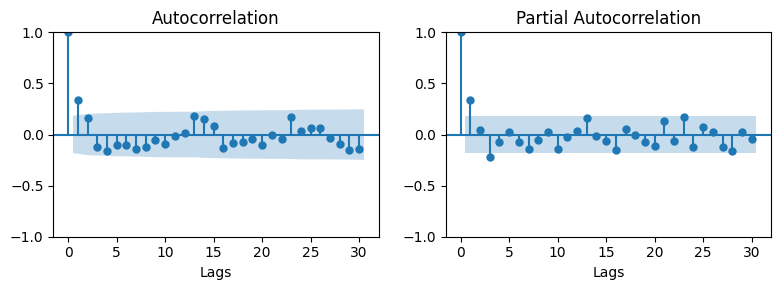

In [4]:
# Import packages
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt

# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
plot_acf(train["residuals"], lags=30, ax=ax[0])
ax[0].set_xlabel("Lags")
plot_pacf(train["residuals"], lags=30, ax=ax[1])
ax[1].set_xlabel("Lags")
plt.tight_layout()
plt.show()

In [5]:
# Import packages
from statsmodels.stats.diagnostic import acorr_ljungbox

# Carry out Ljung-Box test
print(acorr_ljungbox(train["residuals"], return_df=True))

      lb_stat  lb_pvalue
1   13.917146   0.000191
2   16.931975   0.000211
3   18.861072   0.000292
4   22.061208   0.000195
5   23.398389   0.000283
6   24.627916   0.000400
7   27.059270   0.000325
8   29.031125   0.000313
9   29.344194   0.000567
10  30.414797   0.000733


In [6]:
# Import plotly
import plotly.graph_objects as go

# Plot histogram of the residuals
fig = px.histogram(train, x="residuals")
fig.update_layout(
    template="simple_white",
    font=dict(size=18),
    title_text="Distribution of Residuals",
    width=700,
    title_x=0.5,
    height=400,
    xaxis_title="Residuals",
    yaxis_title="Count",
)
fig.show()

# Mean of residuals
print(train["residuals"].mean())

-0.023048689329401923
